In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection, linear_model

In [3]:
membership_df = pd.read_csv("/Users/miranda/Desktop/497-proj/Membership_Updated.csv")

age_df = membership_df["Age"]
total_donation_df = membership_df['Total Donation Amount']
age_donation_df = pd.concat([age_df, total_donation_df], axis=1)

moneycap_filter10_df = age_donation_df.loc[age_donation_df['Total Donation Amount'] < 10000]
moneycap_filter_clean = moneycap_filter10_df.loc[age_donation_df['Total Donation Amount'] != 0]

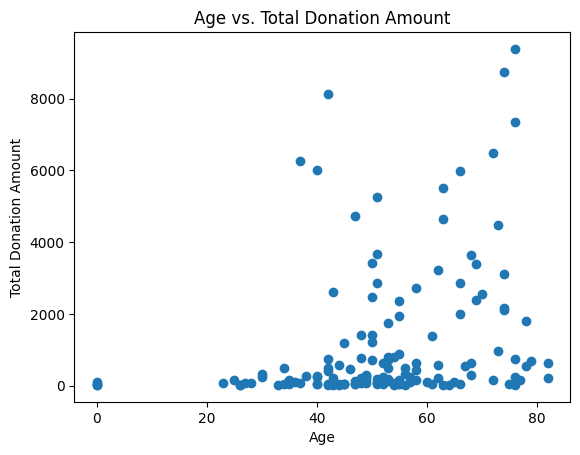

In [4]:
plt.scatter(moneycap_filter_clean['Age'], moneycap_filter_clean['Total Donation Amount'])
plt.title('Age vs. Total Donation Amount')
plt.xlabel("Age")
plt.ylabel("Total Donation Amount")
plt.show()

train_r2 mean: 0.0873058463974963
train_std 0.017084701314247667
test_r2 -1.7628757174167808
test_std 5.079788465703132


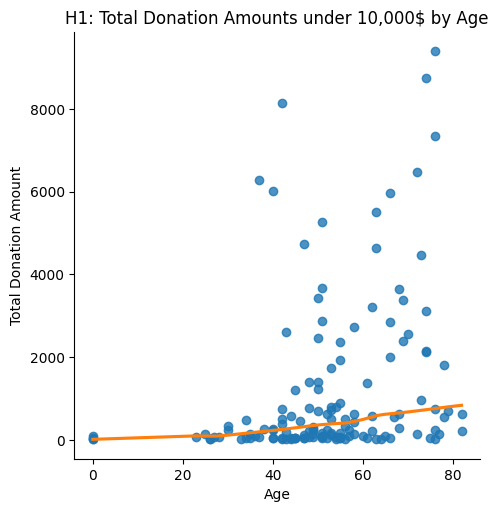

In [5]:
X= moneycap_filter_clean['Age'].values.reshape(-1,1)
y=moneycap_filter_clean['Total Donation Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
xval = model_selection.KFold(10, shuffle=True)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

results = model_selection.cross_validate(regressor, X,y, cv=xval, scoring='r2', return_train_score =True)
train_r2 = results['train_score'].mean() 
train_std = results['train_score'].std() 
test_r2 = results['test_score'].mean()
test_std = results['test_score'].std()

print('train_r2 mean:', train_r2)
print('train_std', train_std)
print('test_r2', test_r2)
print('test_std',test_std)

sns.lmplot(x='Age', y='Total Donation Amount', data=moneycap_filter_clean, lowess=True, line_kws={'color': "C1"}).set(title='H1: Total Donation Amounts under 10,000$ by Age')